# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab

The objective of this experiment is how to derive Conclusions from the DataSet after applying Logistic Regression. 


In this experiment we have taken a sample data showing the relation between number of Hours Spent studying and Pass/ Fail status. We will plot a graph showing Probability of passing the exam vs Hours of Studying.

#### Keywords

- Logistic Regression
- Learning Rate

#### Expected time : 60

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_Logistic_Regression" #name of the notebook
Answer = "This notebook is not graded"
def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp2/AIML_DS_HOURS_STUDYHOURSANDRESULTS.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
# Setting up the files
dataset = "AIML_DS_HOURS_STUDYHOURSANDRESULTS.csv"

### Reading  the data

In [12]:
data = pd.read_csv(dataset, header=0,  names=['Hours', 'Pass'])
print(data[:5])

   Hours  Pass
0   0.50     0
1   0.75     0
2   1.00     0
3   1.25     0
4   1.50     0


In [13]:
x = data['Hours'].values
y = data['Pass'].values
print(len(x), x)
print(len(y), y)

20 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 4.   4.25 4.5  4.75 5.   5.5 ]
20 [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


### Now let us calculate the logistic function

In [0]:
def logf(a, b, x):
    return 1.0 / (1.0 + np.exp(-a * x - b))

def dlogf(a, b, x):
    return logf(a, b, x) * (1 - logf(a, b, x))
##
## The derivative of the logistic function is f * (1 - f)
##
def one_step(x, y, a, b, eta):
    ycalc = logf(a, b, x)
    delta_a = sum((y - ycalc) * ycalc * (1 - ycalc) * x)
    delta_b = sum((y - ycalc) * ycalc * (1 - ycalc))
    a = a + delta_a * eta
    b = b + delta_b * eta
    error = sum((y - ycalc)**2)
    return a, b, error

### $eta$ = 0.001

In [0]:
a, b = 1, 1
eta = 0.001
for times in range(100000):
  a, b, error = one_step(x, y, a, b, eta)
  if times % 1000 == 0:
    eta = max(0.00001, eta * 0.99)
    if times % 5000 == 0:
      print(" a : {},\n b : {},\n Error : {}\n #########################".format(a, b, error))

### We will plot data and observe how logistic regression work

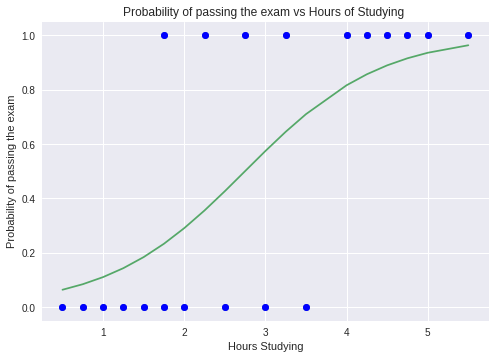

In [21]:
import matplotlib.pyplot as plt
plt.plot(data.Hours, data.Pass, "o")
plt.xlabel("Hours Studying")
plt.ylabel("Probability of passing the exam")
plt.title("Probability of passing the exam vs Hours of Studying ")

ycalc = logf(a, b, x)
plt.plot(x, ycalc)
plt.plot(x, y, "bo")
plt.grid(True)
plt.show()

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [25]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2720
Date of submission:  23 Mar 2019
Time of submission:  17:22:13
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
